# Uniform Manifold Approximation and Projection (UMAP)

It is a *dimension reduction technique* that can preserve both of the local, and global data structure as compared to t-SNE. UMAP is a versatile and widely used technique.
 
### **UMAP parameters**

We have some parameters that we can adjust depending the data that we are using. For example in the code above we use only three parameters.

* **n_components**: Specifies the dimensionality of the low-dimensional embedding. 

By default, it is 2,for visualization in a 2D plot. However, you can choose a higher value to obtain a higher-dimensional embedding if needed.

* **n_neighbors**: This parameter determines the number of nearest neighbors used to construct the neighborhood graph. Increasing n_neighbors can capture more global structure, but may also increase computation time. A typical value is between 5 and 50, depending on the size and density of the dataset.

* **min_dist**: It controls the minimum distance between points in the low-dimensional embedding. A smaller value of min_dist allows for tighter clustering, but can result in overfitting and crowded visualizations. Increasing min_dist encourages more even spacing between points.

* **metric**: UMAP supports various distance metrics to measure similarity between data points in the high-dimensional space. Common choices include **Euclidean distance(default), Manhattan distance**, and others.

* **random_state**: if we need to have reproducibility in our results, we can set a seed by using random_state.

### Geometric Intuition of UMAP:

**Step 1: Manifold Learning**
UMAP aims to understand the intrinsic structure of your data, treating it as if it lies on a lower-dimensional manifold within the high-dimensional space.

**Step 2: Local and Global Relationships**

**Local Relationships**: UMAP focuses on preserving local relationships between data points, meaning points that are close to each other in the high-dimensional space should remain close in the lower-dimensional space.

**Global Structures**: Simultaneously, UMAP strives to capture global structures, ensuring that broader patterns and arrangements are also maintained.

**Step 3: Neighbors and Distances**

**Neighborhood Concept**: For each data point, UMAP considers its neighborhood, defined by a certain number of nearest neighbors. This neighborhood is crucial for preserving local relationships.

**Distance Metric**: UMAP uses a distance metric (e.g., Euclidean distance) to measure the similarity between data points within their neighborhoods.

**Step 4: Fuzzy Topological Representation**
UMAP introduces a fuzzy, topological representation of the data. This involves creating a set of relationships that capture both the near and far connections within the neighborhood.

**Step 5: Optimization**
UMAP utilizes Stochastic Gradient Descent as part of its optimization process. SGD helps in iteratively adjusting the low-dimensional representation of points to minimize the cost function, which balances the preservation of local and global structures based on the fuzzy topological relationships.

**Step 6: Embedding in Lower Dimensions**
The result is an embedding of your data in a lower-dimensional space, where each point's position reflects its relationships with other points in the original high-dimensional space.

**Step 7: Visualization**
This lower-dimensional representation is then often visualized to gain insights into the data's structure and relationships.



### Data Importing and Understanding

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [2]:
df_train = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_train.csv")
df_train.shape

(60000, 785)

In [6]:
df_train.sample(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
36999,1,0,0,0,0,0,0,0,0,0,...,77,0,0,0,0,0,0,0,0,0
32251,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39580,8,0,0,0,0,0,0,0,0,0,...,116,109,106,89,58,50,0,0,0,0
9130,6,0,0,0,0,0,0,0,2,1,...,27,0,0,0,160,122,52,0,0,0
58096,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,112,187,181,60,0,0


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [18]:
df_train.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

### Labels

Each training and test example is assigned to one of the following labels:

Label	Description

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

### Plotting the Images of Fashion MNIST 

for better Understanding of Dataset

In [9]:
import matplotlib.pyplot as plt

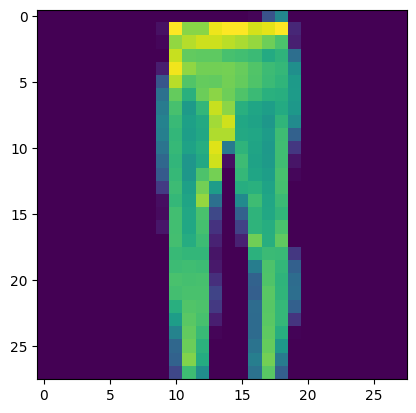

In [14]:
plt.imshow(df_train.iloc[36999, 1:].values.reshape(28,28))

So, as we can assume that this aplot is a Trouser as per Labeling also.

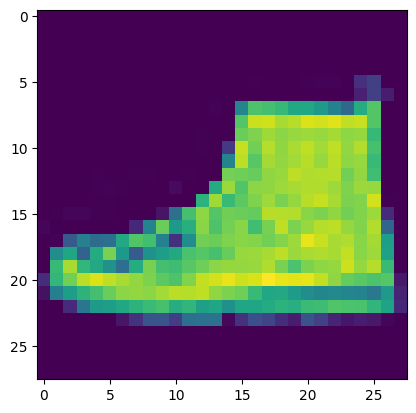

In [16]:
plt.imshow(df_train.iloc[32251, 1:].values.reshape(28,28))

It is clear the that plot is of an Ankle Boot.

In [3]:
# Separate features and labels

train_inputs = df_train.iloc[:10000,1:] # Every Column other than 1st
train_target = df_train.iloc[:10000,0] # Label Column

In [4]:
train_inputs.shape

(10000, 784)

# UMAP Implementation

In [5]:
from umap import UMAP

2024-02-26 11:43:04.105186: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 11:43:04.105369: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 11:43:04.283145: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
%%time
umap_model = UMAP(n_components=2)
umap_result = umap_model.fit_transform(train_inputs)

CPU times: user 1min 31s, sys: 1.72 s, total: 1min 33s
Wall time: 52.2 s


In [7]:
df_umap = pd.DataFrame({'UMAP Dimension 1': umap_result[:, 0], 'UMAP Dimension 2': umap_result[:, 1], 'Label': train_target})
df_umap

,UMAP Dimension 1,UMAP Dimension 2,Label
0,8.441162,-1.186029,2
1,-3.193335,6.081607,9
2,11.389714,-1.204064,6
3,12.742605,4.619618,0
4,12.477728,2.131540,3
...,...,...,...
9995,11.488853,0.276585,2
9996,-2.678013,9.709865,7
9997,8.764926,-2.246056,8
9998,-2.191193,7.213434,5


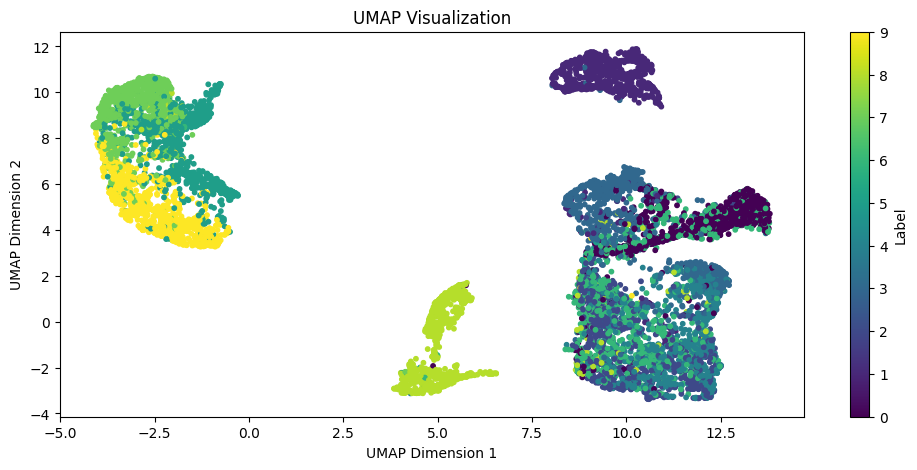

In [28]:
# Visualize 2D embeddings with labels
plt.figure(figsize=(12, 5))

# Scatter plot with labels
scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=train_target, cmap='viridis', s=10)
plt.title('UMAP Visualization')

# Add colorbar and labels
cbar = plt.colorbar(scatter)
cbar.set_label('Label')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')


plt.show()


## Major Clusters forms are: 

1. (5,7,9) (Sandal, Sneaker, Ankle Boot)

2. 8 (Bag) 

3. (0, 2, 3, 4) 	(T-shirt/top, Pullover, Dress, Coat)

4. 1	(Trouser)


# t-SNE Implementation

In [29]:
import seaborn as sns
from sklearn.manifold import TSNE

### Running t-SNE on small dataset 
to calculate the time 

In [31]:
train_inputs_tsne = df_train.iloc[:1000,1:] # Every Column other than 1st
train_target_tsne = df_train.iloc[:1000,0] # Label Column

In [32]:
%%time

# t-SNE
tsne_model = TSNE(n_components=2)
tsne_result = tsne_model.fit_transform(train_inputs_tsne)

CPU times: user 20.9 s, sys: 294 ms, total: 21.2 s
Wall time: 5.65 s


Since time taken is manageble I can run the t-sne model on 10K data.

In [33]:
%%time

# t-SNE
tsne_model = TSNE(n_components=2)
tsne_result = tsne_model.fit_transform(train_inputs)

CPU times: user 3min 57s, sys: 914 ms, total: 3min 58s
Wall time: 1min 6s


## Let us compare the results from UMAP and t-SNE:

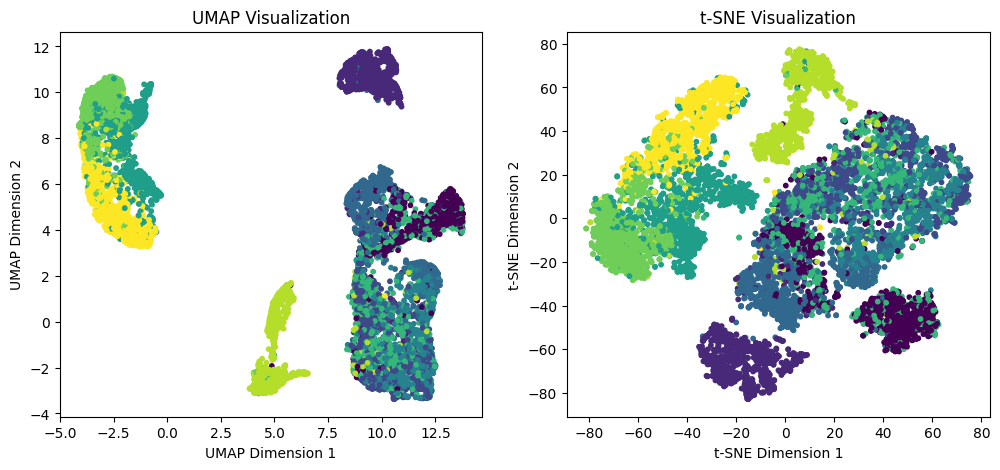

In [38]:
# Visualize 2D embeddings
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=train_target, cmap='viridis', s=10)
plt.title('UMAP Visualization')
# Add colorbar and labels
cbar = plt.colorbar(scatter)
cbar.set_label('Label')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')


plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=train_target, cmap='viridis', s=10)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.show()

We can infer that the correlation between the components obtained from UMAP is quite less as compared to the correlation between the components obtained from t-SNE. 

Hence, UMAP tends to give better results with 2 Components.

### Splitting data into Train/Test sets

In [39]:
umap_train_inputs = df_umap.iloc[:,0:2] # Every Column other than 1st
umap_train_target = df_umap.iloc[:,-1] 

In [40]:
umap_train_inputs

,UMAP Dimension 1,UMAP Dimension 2
0,8.441162,-1.186029
1,-3.193335,6.081607
2,11.389714,-1.204064
3,12.742605,4.619618
4,12.477728,2.131540
...,...,...
9995,11.488853,0.276585
9996,-2.678013,9.709865
9997,8.764926,-2.246056
9998,-2.191193,7.213434


In [41]:
umap_train_target

0       2
1       9
2       6
3       0
4       3
       ..
9995    2
9996    7
9997    8
9998    5
9999    5
Name: Label, Length: 10000, dtype: int64

In [42]:
df_test = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_test.csv")
df_test.shape

(10000, 785)

In [43]:
# Separate features and labels

test_inputs = df_test.iloc[:,1:] # Every Column other than 1st
test_target = df_test.iloc[:,0] # Label Column

In [44]:
test_inputs.shape

(10000, 784)

In [45]:
%%time
# UMAP
# umap_test_model = UMAP(n_components=2)


umap_test_result = umap_model.fit_transform(test_inputs)

CPU times: user 42.9 s, sys: 976 ms, total: 43.9 s
Wall time: 13.8 s


In [46]:
# Creating df_test
df_test = pd.DataFrame({'UMAP Dimension 1': umap_test_result [:, 0], 'UMAP Dimension 2': umap_test_result [:, 1], 'Label': test_target})

In [47]:
df_test_inputs = df_test.iloc[:,0:2] # Every Column other than 1st
df_test_target = df_test.iloc[:,-1] 

In [48]:
df_test_inputs

,UMAP Dimension 1,UMAP Dimension 2
0,-2.956444,6.111563
1,-0.054195,-3.198710
2,1.504299,9.191546
3,1.480533,11.229041
4,-1.162423,7.684431
...,...,...
9995,-1.149513,6.026996
9996,1.175538,8.969909
9997,4.900777,8.877490
9998,2.452604,12.505502


In [49]:
df_test_target

0       0
1       1
2       2
3       2
4       3
       ..
9995    0
9996    6
9997    8
9998    8
9999    1
Name: Label, Length: 10000, dtype: int64

### Model Building

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [51]:
# Model Training

svc = SVC(kernel = 'sigmoid', gamma = 1.0, random_state = 42)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth = 5, random_state = 42)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1', random_state = 42)
rfc = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [52]:
clfs = {
    'Support Vector Classification' : svc,
    'KNeighbors Classifier' : knc,
    'Decision Tree Classifier': dtc, 
    'Logistic Regression': lrc, 
    'Random Forest Classifier': rfc, 
}


In [53]:
def train_classifier(clf, df_train_inputs, df_train_target, df_test_inputs, df_test_target):
    clf.fit(df_train_inputs, df_train_target)
    test_pred = clf.predict(df_test_inputs)
    accuracy = accuracy_score(df_test_target, test_pred)
    
    return accuracy

In [54]:
%%time

accuracy_scores = []

for name, clf in clfs.items():
    
    accuracy = train_classifier(clf, umap_train_inputs, umap_train_target, df_test_inputs, df_test_target)
    
    print("For ", name)
    print("Accuracy - ", accuracy)

    accuracy_scores.append(accuracy)

For  Support Vector Classification
Accuracy -  0.0259
For  KNeighbors Classifier
Accuracy -  0.0009
For  Decision Tree Classifier
Accuracy -  0.0042


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


For  Logistic Regression
Accuracy -  0.0014
For  Random Forest Classifier
Accuracy -  0.0256
CPU times: user 10.3 s, sys: 11 ms, total: 10.3 s
Wall time: 10.3 s


In [55]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores}).sort_values('Accuracy',ascending=False)
performance_df

,Algorithm,Accuracy
0,Support Vector Classification,0.0259
4,Random Forest Classifier,0.0256
2,Decision Tree Classifier,0.0042
3,Logistic Regression,0.0014
1,KNeighbors Classifier,0.0009


It seems that the accuracy values calculated are quite low, which might indicate potential issues with the models. That's why I'll using data with all the columns for Model Evaluation.

In [56]:
train_inputs

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,2,0,0,1,0,...,111,85,35,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,2,0,22,126,0,5,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
%%time

accuracy_scores = []

for name, clf in clfs.items():
    
    accuracy = train_classifier(clf, train_inputs, train_target, test_inputs, test_target)
    
    print("For ", name)
    print("Accuracy - ", accuracy)

    accuracy_scores.append(accuracy)

For  Support Vector Classification
Accuracy -  0.1
For  KNeighbors Classifier
Accuracy -  0.8218
For  Decision Tree Classifier
Accuracy -  0.6951
For  Logistic Regression
Accuracy -  0.7849
For  Random Forest Classifier
Accuracy -  0.8495
CPU times: user 11min 47s, sys: 1.93 s, total: 11min 49s
Wall time: 11min 41s


In [58]:
full_performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores}).sort_values('Accuracy',ascending=False)
full_performance_df

,Algorithm,Accuracy
4,Random Forest Classifier,0.8495
1,KNeighbors Classifier,0.8218
3,Logistic Regression,0.7849
2,Decision Tree Classifier,0.6951
0,Support Vector Classification,0.1000


### Cross validation using cross_val_score

In [60]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfc, train_inputs, train_target, cv=5, scoring='accuracy').mean()

0.8522000000000001

In [62]:
test_pred = rfc.predict(test_inputs)
test_pred

array([0, 1, 2, ..., 8, 8, 2])

In [63]:
accuracy_score(test_target,test_pred)

0.8495

**Advanatges of UMAP**

1. **Adaptability and Versatility**

UMAP's adaptability allows it to efficiently handle both small and large datasets, making it a versatile tool for various data analysis tasks.

2. **Exploration and Understanding**

It can be use UMAP for exploration and understanding, identifying clusters, patterns, and relationships in the data.



-- Despite these advantages, users should be aware of these limitations when applying UMAP to their specific datasets. 

**Disadavantages of UMAP**

1. **Sensitive to Hyperparameters**:

UMAP performance can be sensitive to hyperparameters, such as the number of neighbors and the minimum distance. Choosing appropriate values for these parameters can require some trial and error.

2. **Non-Reproducibility**:

UMAP is inherently a stochastic algorithm, meaning it can provide slightly different results on each run. While this randomness aids in capturing complex structures, it may make direct comparisons or reproducing exact results challenging. (As seen above)

3. **Interpretability**:

The interpretability of UMAP embeddings might be challenging compared to linear techniques like PCA. Understanding the meaning of the new coordinates in the reduced space can be less straightforward.